In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

In [3]:
periods = 40
ppp=500


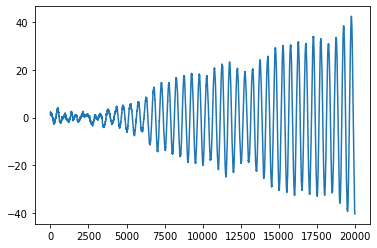

In [4]:
from misc import load_data, get_def_path

ppp=500
periods=40
train_id = 0
defpath = get_def_path()
path = defpath+"{}periods/{}ppp/".format(periods,ppp)
means, covs, signals, coeffs = load_data(path)
tfsignals = tf.convert_to_tensor(signals)[tf.newaxis]
A,dt,C,D = coeffs
times = np.linspace(0,periods, periods*ppp+1)
total_time = times[-1]
plt.plot(means[:,0])

In [5]:
from misc import ct 
xi = lambda cov: np.dot(cov, ct(C)) + ct(D)

give_pred = lambda state: np.dot(C,state)*dt
def evolve_state(states, AA, dy):
    x, cov = states
    XiCov = xi(cov)
    dx = np.dot(AA - np.dot(XiCov,C), x)*dt + np.dot(XiCov, dy)  #evolution update (according to what you measure)
    dcov = (np.dot(AA,cov) + np.dot(cov, ct(AA)) + D - np.dot(XiCov, ct(XiCov)))*dt  #covariance update
    return [x + dx, cov + dcov]

In [6]:
landscape = {}
parameters = np.arange(0,4*np.pi,np.pi/10)
for periods in range(40,41,1):

    dt = 1/ppp
    total_points = int(periods*ppp)

    symplectic = np.array([[0,1],[-1,0]])
    predictions, states = {t:[] for t in range(len(parameters))},{t:[means[0], covs[0]] for t in range(len(parameters))}

    for k in tqdm(range(total_points)):

        dy = signals[k]

        for i in range(len(parameters)):
            predictions[i].append(give_pred(states[i][-1][0]))
            states[i].append(evolve_state(states[i][-1], parameters[i]*symplectic, dy))

    loss = {}
    for i in range(len(parameters)):
        loss[i] = np.sum(np.square(np.array(predictions[i]) - np.array(signals)))/(2*dt*len(predictions[i]))
    landscape[periods] = list(loss.values())

100%|██████████| 20000/20000 [03:13<00:00, 103.21it/s]


In [7]:
from misc import get_def_path

In [ ]:
parameters = np.arange(0,4*np.pi+np.pi/2,np.pi/2)


In [ ]:
loss_values = {}
landscape = {}
for k in range(16):
    length_series = [int(j) for j in np.logspace(2,np.log10(len(signals[:,0])), 16)][k]
    land_path = get_def_path()+"{}periods/{}ppp/training/train_id_{}/landscape/".format(periods,ppp,k)
    loss_values[length_series] = np.load(land_path+"loss_values.npy")
    landscape[length_series] = loss_values[length_series]

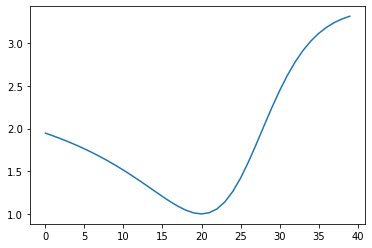

In [12]:
plt.plot(nump)

ERROR! Session/line number was not unique in database. History logging moved to new session 257


NameError: name 'axins' is not defined

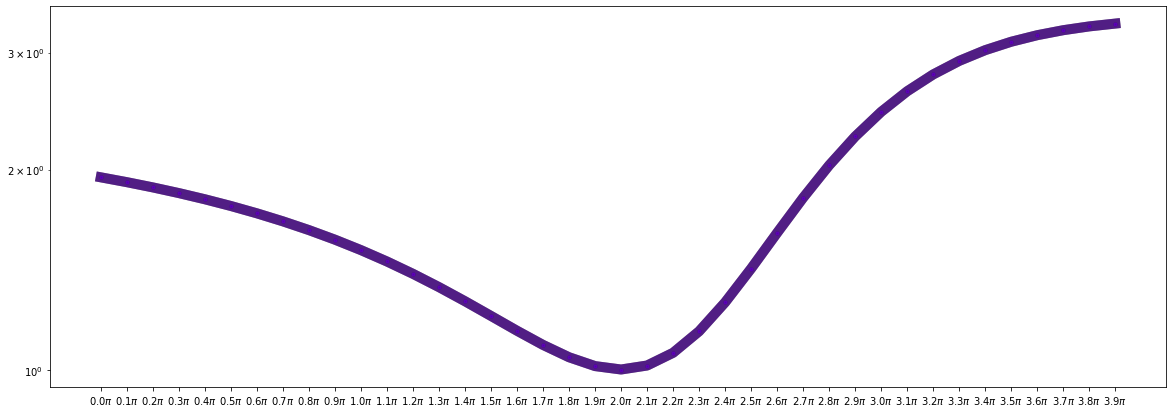

In [13]:
plt.figure(figsize=(20,7))

colors = plt.get_cmap("rainbow")
ax = plt.subplot2grid((1,1),(0,0))
#axins = ax.inset_axes([2*np.pi - np.pi/2, .99, np.pi, 1.5],  transform=ax.transData)
#axins.set_xticks([])

ax.plot(parameters,nump,'.-', linewidth=10, alpha=0.8,color="black", label="NUMPY")

for ind,i in enumerate(list(landscape.keys())):
    ax.plot(parameters,landscape[i],'.-', linewidth=10, alpha=0.4,color=colors(np.linspace(0,1,len(landscape)))[ind], label="#={}".format(i))
    ax.set_xticks(ticks=parameters)
    ax.set_xticklabels([str(np.round(p/np.pi,1))+r'$\pi$' for p in parameters])
    ax.set_yscale('log')
    axins.plot(parameters,landscape[i],'.-', linewidth=10, alpha=0.4,color=colors(np.linspace(0,1,len(landscape)))[ind])
    axins.set_xlim([2*np.pi - np.pi/4, 2*np.pi + np.pi/4])
    axins.set_ylim([.95,1.2])

plt.legend(prop={"size":8}, loc='upper left')
ax.indicate_inset_zoom(axins, edgecolor="black")


plt.xlabel(r'$\hat{\omega}$',size=20)
plt.ylabel(r'$L = \frac{1}{2 T}(\sum_t \; |d\vec{y}_t - C\hat{x}_t dt|^2) \sim \dfrac{1}{2} (\sum_t dW^2 + dW^2) \sim 1$', size=20)
plt.savefig("plt_comparis.png")

In [1]:
plt.figure(figsize=(10,10))
colors = plt.get_cmap("rainbow")
for ind,length_series in enumerate(list(loss_values.keys())):
    plt.plot(parameters,loss_values[length_series], color=colors(np.linspace(0,1,16))[ind], linewidth=6)
    plt.scatter(parameters,loss_values[length_series], label="T=" + str(length_series), color=colors(np.linspace(0,1,16))[ind], s=200)
    
plt.xlabel(r'$\hat{\omega}$', size=40)
plt.ylabel(r'$L = \frac{1}{2 T}(\sum_t \; |d\vec{y}_t - C\hat{x}_t dt|^2) \sim \dfrac{1}{2} (\sum_t dW^2 + dW^2) \sim 1$',size=20)
plt.legend(prop={'size':30})
plt.title(r'$\omega = $'+str(np.round(2*np.pi,2)),size=40)
#plt.xticks(ticks=parameters, labels=[np.round(k,2) for k in parameters])

NameError: name 'plt' is not defined

In [8]:
for k,v in loss_values.items():
    os.makedirs(get_def_path()+"loss_landscape/",exist_ok=True)
    np.save(get_def_path()+"loss_landscape/{}_{}".format(periods,ppp)+str(k),v)